# **`Bank Churn Prediction`**

### **`Objective: `**
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months..

### **`Context: `**
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.


###  **`Data Description: `**
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

###  **`Data Dictionary: `**
* **RowNumber**: Row number.
* **CustomerId**: Unique identification key for different customers.
* **Surname**: Surname of the customer
* **Credit Score**: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
* **Geography**: The country to which the customer belongs.
* **Gender**: The gender of the customer.
* **Age**: Age of the customer.
* **Tenure**: The period of time a customer has been associated with the bank.
* **Balance**: The account balance (the amount of money deposited in the bank account) of the customer.
* **NumOfProducts**: How many accounts, bank account affiliated products the person has.
* **HasCrCard**: Does the customer have a credit card through the bank?
* **IsActiveMember**: Subjective, but for the concept
* **EstimatedSalary**: Estimated salary of the customer.
* **Exited**: Did they leave the bank after all?

## **`Points Distribution:`**


###  **`Deliverable – 1: Read Data`** 
Read the dataset

###  **`Deliverable – 2: Feature Elimination`**
Drop the columns which are unique for all users like IDs. **(5 Marks)**

###  **`Deliverable – 3: Bivariate`** 
Perform bivariate analysis and give your insights from the same **(5 Marks)**

###  **`Deliverable – 4: Data Split`** 
Distinguish the feature and target set and divide the data set into training and test sets **(5 Marks)**

###  **`Deliverable – 5: Normalization`** 
Normalize the train and test data. **(10 Marks)**

###  **`Deliverable – 6: Modelling`** 
Initialize & build the model. Identify the points of improvement and implement the same. **(20 Marks)**

###  **`Deliverable – 7: Prediction at 0.5 Threshold`**
Predict the results using 0.5 as a threshold. **(10 Marks)**

###  **`Deliverable – 8: Model Performance Evaluation`**
Print the Accuracy score and confusion matrix. **(5 Marks)**



# <a id = "link101"></a> `Index: `

- <a href = #link102>**Deliverable – 1** </a>
- <a href = #link102>**Deliverable – 2**</a>
- <a href = #link104>**Deliverable – 3**</a>
- <a href = #link105>**Deliverable – 4**</a>
- <a href = #link106>**Deliverable – 5**</a>
- <a href = #link107>**Deliverable – 6**</a>
- <a href = #link108>**Deliverable – 7**</a>
- <a href = #link108>**Deliverable – 8**</a>

# **`Deliverable – 1 And Deliverable – 2`** <a id = "link102"></a>

<a href = #link101> Back to Index </a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline 

In [3]:
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report

In [5]:
#Read Data
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive/'My Drive'/'Colab Notebooks'
pdata  = pd.read_csv('bank.csv')
pdata.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **`Observation:`** 

<a href = #link101> Back to Index </a>

No nulls observed. There are zeros in columns Balance, HasCrCard, IsActiveMember, and Exited. They seem to be legit values.

**Important Note:** 
1. ***RowNumber*** and ***CustomerId*** appear like an ID column, check their uniqueness. If all values are unique, then they will be considered as categorical columns and dropped from further processing. 
2. ***Surname*** can be dropped.
3. ***Geography*** and ***Gender*** can be one hot encoded.
3. ***Balance*** and ***EstimatedSalary*** may dominate further processing (e.g. averages),  therefore, scaling is required before further processing.

In [6]:
#Stastical Analysis
print(pdata.shape)

(10000, 14)


*There are 10000 rows and 14 columns in data.*

In [7]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
#Step4: Find number of unique values in each column. Analyse outcome for categorical variables.

pdata.nunique() # Number of unique values in a column

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### **`Observation:`** 


<a href = #link101> Back to Index </a>

***RowNumber***: Number of rows in data and number of unique values in this column are same. It can be confirmed that *RowNumber* is the record identifier. Drop this column.

***CustomerId:*** Number of rows in data and number of unique values in this column are the same. This column appears like a key, and can be dropped.

***EstimatedSalary:*** Has only one duplicate. It might be worth checking if there are exact row duplicates.

In [10]:
pdata1 = pdata[pdata.duplicated(["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance",
                                 "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"])]
pdata1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [11]:
#Next, it might be worth checking if the two records which have same EstimatedSalary have some other common fields.
pdata1 = pdata[pdata.duplicated(["EstimatedSalary"])]

In [12]:
pdata[pdata['EstimatedSalary']==24924.92]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3176,3177,15613014,Hs?,722,Germany,Male,29,1,107233.85,2,1,0,24924.92,0
3620,3621,15763806,Astorga,773,France,Male,41,4,0.00,2,1,1,24924.92,0


In [13]:
# This is an attempt to understand if the Surname column has any relationship with customers exiting.

pdata1 = pdata[pdata['Exited']==1][['Surname','Exited']].groupby(['Surname'])['Exited'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
pdata1

,Surname,count
993,Smith,9
723,McGregor,9
634,Lin,9
698,Martin,9
687,Manna,7
...,...,...
467,Harker,1
468,Harriman,1
472,Hawdon,1
473,Hawes,1


### **`Observation:`** 

<a href = #link101> Back to Index </a>

No duplicate rows found. Could not find any relationship between Surname and Exited. Therefore, drop the column. 

Next, drop the columns required. Encode columns required.

In [14]:
#Drop Columns
pdata  = pd.read_csv('bank.csv')

pdata.drop(["RowNumber","CustomerId","Surname"], axis=1,inplace=True)

In [15]:
print(pdata['Exited'].value_counts(normalize=True))

0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [16]:
# value counts gives us how many times does the value 
print(pdata['Geography'].value_counts(normalize=True))
print('')
print(pdata['Gender'].value_counts(normalize=True))

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64


In [17]:
print(pdata['NumOfProducts'].value_counts(normalize=True))
print('')

print(pdata['Tenure'].value_counts(normalize=True))
print('')

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

2     0.1048
1     0.1035
7     0.1028
8     0.1025
5     0.1012
3     0.1009
4     0.0989
9     0.0984
6     0.0967
10    0.0490
0     0.0413
Name: Tenure, dtype: float64



In [18]:
# convert the Geography values to one-hot code to remove the order

pdata = pd.get_dummies(pdata, columns=['Geography'])
pdata.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [19]:
# convert the Gender values to one-hot code to remove the order
pdata = pd.get_dummies(pdata, columns=['Gender'])
pdata.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


In [20]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [21]:
pdata.shape

(10000, 14)

In [22]:
#Step1: Find out how many nulls each column has:

print("Column Names and number of nulls they contains is as follows:")
print(pdata.isnull().sum()) # Number of nulls in each column of the dataframe
#pdata.isnull().values.any() # This is another way to check if there are any null values in data set

Column Names and number of nulls they contains is as follows:
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64


In [23]:
#Step2: Find out how many zeros are present in data.

print(pdata[:][pdata[:] == 0].count()) # Number of zeros in a column

CreditScore             0
Age                     0
Tenure                413
Balance              3617
NumOfProducts           0
HasCrCard            2945
IsActiveMember       4849
EstimatedSalary         0
Exited               7963
Geography_France     4986
Geography_Germany    7491
Geography_Spain      7523
Gender_Female        5457
Gender_Male          4543
dtype: int64


In [24]:
#Step3: Find if any negative values are present in data:

print(pdata[:][pdata[:] < 0].count()) # Number of negatives in a column

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64


In [25]:
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geography_France,10000.0,0.501400,0.500023,0.00,0.00,1.000,1.0000,1.00


### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. There are 14 (Working) columns and 10000 rows in the dataset.
2. Scaling is required.
3. No nulls and negative values observed.
4. Some columns have zeros, e.g. Balance and Tenure, but these zeros seem legit values.

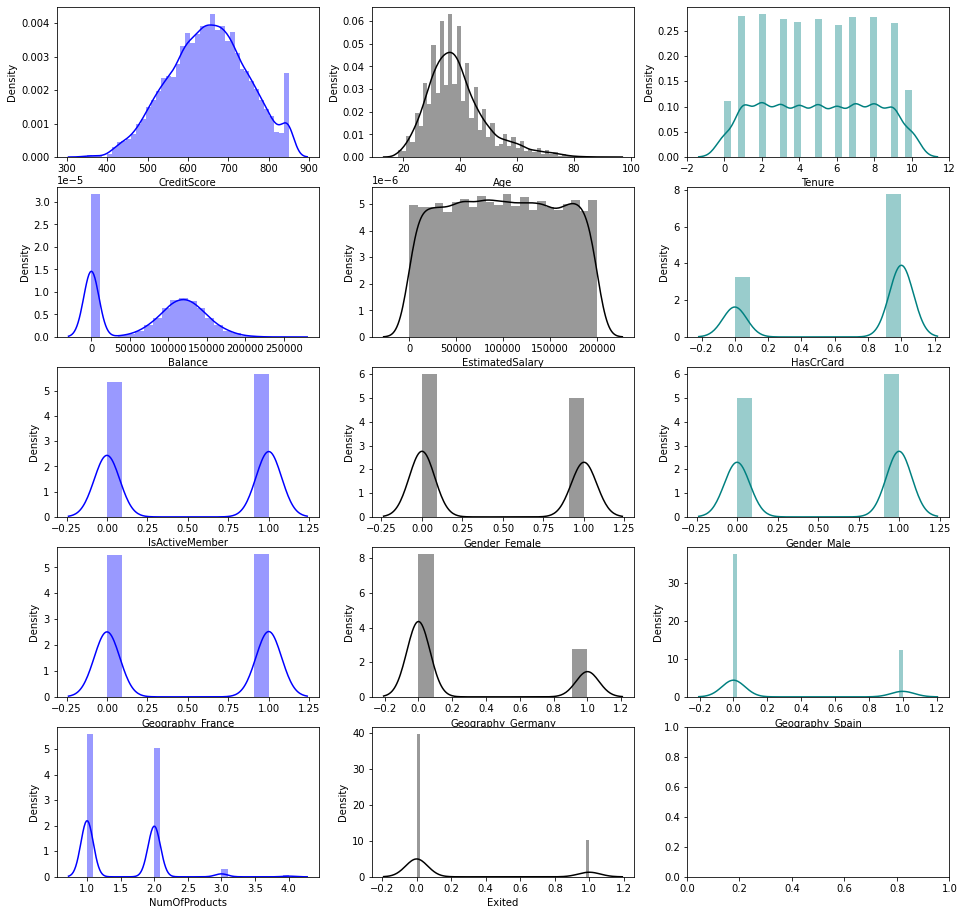

In [26]:
#Step6: Distribution Analysis
f, axes = plt.subplots(5, 3, figsize=(16, 16), sharex=False)
sns.distplot( pdata["CreditScore"] , color="blue", ax=axes[0, 0])
sns.distplot( pdata["Age"] , color="black", ax=axes[0, 1])
sns.distplot( pdata["Tenure"] , color="teal", ax=axes[0, 2])

sns.distplot( pdata["Balance"] , color="blue", ax=axes[1, 0])
sns.distplot( pdata["EstimatedSalary"] , color="black", ax=axes[1, 1])
sns.distplot( pdata["HasCrCard"] , color="teal", ax=axes[1, 2])

sns.distplot( pdata["IsActiveMember"] , color="blue", ax=axes[2, 0])
sns.distplot( pdata["Gender_Female"] , color="black", ax=axes[2, 1])
sns.distplot( pdata["Gender_Male"] , color="teal", ax=axes[2, 2])

sns.distplot( pdata["Geography_France"] , color="blue", ax=axes[3, 0])
sns.distplot( pdata["Geography_Germany"] , color="black", ax=axes[3, 1])
sns.distplot( pdata["Geography_Spain"] , color="teal", ax=axes[3, 2])

sns.distplot( pdata["NumOfProducts"] , color="blue", ax=axes[4, 0])
sns.distplot( pdata["Exited"] , color="black", ax=axes[4, 1])

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. *CreditScore*, *Age*, and *NumberofProducts* have outliers.
2. *Age* ranges between 18 and 92. Both values seem legit.
3. *CreditScore* ranges between 350 and 850. Both values are legit.
4. *NumberofProducts* ranges between 1 and 4. Both values are legit.
5. *Balance* has a value of 0 in more than 25% cases. This also seems legit.

Next, perform outlier analysis.

In [27]:
#Step6: Outlier Analysis: Method used: IQR

percentile_25 = {}
percentile_75 = {}
iqr = {}
lower_bound = {}
upper_bound = {}

for i in pdata:
  percentile_25[i] = np.percentile(pdata[i],25)
  percentile_75[i] = np.percentile(pdata[i],75)
  iqr[i] = percentile_75[i] - percentile_25[i]
  lower_bound[i] = percentile_25[i] - (1.5 * iqr[i])
  upper_bound[i] = percentile_75[i] + (1.5 * iqr[i])
        
        
print(percentile_25)
print(percentile_75)
print(iqr)
print(lower_bound)
print(upper_bound)
print("\n")

{'CreditScore': 584.0, 'Age': 32.0, 'Tenure': 3.0, 'Balance': 0.0, 'NumOfProducts': 1.0, 'HasCrCard': 0.0, 'IsActiveMember': 0.0, 'EstimatedSalary': 51002.11, 'Exited': 0.0, 'Geography_France': 0.0, 'Geography_Germany': 0.0, 'Geography_Spain': 0.0, 'Gender_Female': 0.0, 'Gender_Male': 0.0}
{'CreditScore': 718.0, 'Age': 44.0, 'Tenure': 7.0, 'Balance': 127644.24, 'NumOfProducts': 2.0, 'HasCrCard': 1.0, 'IsActiveMember': 1.0, 'EstimatedSalary': 149388.2475, 'Exited': 0.0, 'Geography_France': 1.0, 'Geography_Germany': 1.0, 'Geography_Spain': 0.0, 'Gender_Female': 1.0, 'Gender_Male': 1.0}
{'CreditScore': 134.0, 'Age': 12.0, 'Tenure': 4.0, 'Balance': 127644.24, 'NumOfProducts': 1.0, 'HasCrCard': 1.0, 'IsActiveMember': 1.0, 'EstimatedSalary': 98386.1375, 'Exited': 0.0, 'Geography_France': 1.0, 'Geography_Germany': 1.0, 'Geography_Spain': 0.0, 'Gender_Female': 1.0, 'Gender_Male': 1.0}
{'CreditScore': 383.0, 'Age': 14.0, 'Tenure': -3.0, 'Balance': -191466.36000000002, 'NumOfProducts': -0.5, 'Ha

In [28]:
for i in pdata:
    print("Count of lower bound outliers for column "+ i + ": " + str(pdata[i][pdata[i] < lower_bound[i]].count()))
    print("Count of upper bound outliers for column "+ i + ": " + str(pdata[i][pdata[i] > upper_bound[i]].count()))

Count of lower bound outliers for column CreditScore: 15
Count of upper bound outliers for column CreditScore: 0
Count of lower bound outliers for column Age: 0
Count of upper bound outliers for column Age: 359
Count of lower bound outliers for column Tenure: 0
Count of upper bound outliers for column Tenure: 0
Count of lower bound outliers for column Balance: 0
Count of upper bound outliers for column Balance: 0
Count of lower bound outliers for column NumOfProducts: 0
Count of upper bound outliers for column NumOfProducts: 60
Count of lower bound outliers for column HasCrCard: 0
Count of upper bound outliers for column HasCrCard: 0
Count of lower bound outliers for column IsActiveMember: 0
Count of upper bound outliers for column IsActiveMember: 0
Count of lower bound outliers for column EstimatedSalary: 0
Count of upper bound outliers for column EstimatedSalary: 0
Count of lower bound outliers for column Exited: 0
Count of upper bound outliers for column Exited: 2037
Count of lower 

### **`Observations:`** 

<a href = #link101> Back to Index </a>

*CreditScore*, *Age*, and *NumberofProducts* have outliers as observed during frequency distribution analysis. But all outliers seem legit. Therefore, they won't be treated.

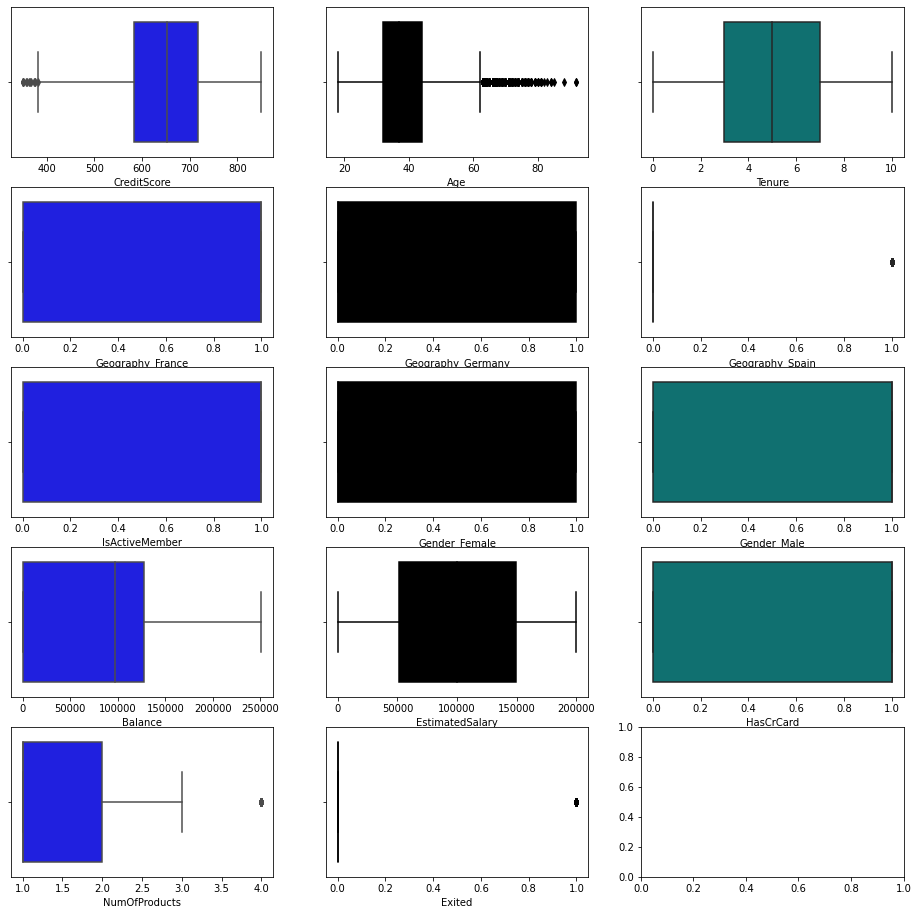

In [29]:
#Step7: BoxPlot Analysis

f, axes = plt.subplots(5, 3, figsize=(16, 16), sharex=False)
sns.boxplot( pdata["CreditScore"] , color="blue", ax=axes[0, 0])
sns.boxplot( pdata["Age"] , color="black", ax=axes[0, 1])
sns.boxplot( pdata["Tenure"] , color="teal", ax=axes[0, 2])

sns.boxplot( pdata["Geography_France"] , color="blue", ax=axes[1, 0])
sns.boxplot( pdata["Geography_Germany"] , color="black", ax=axes[1, 1])
sns.boxplot( pdata["Geography_Spain"] , color="teal", ax=axes[1, 2])

sns.boxplot( pdata["IsActiveMember"] , color="blue", ax=axes[2, 0])
sns.boxplot( pdata["Gender_Female"] , color="black", ax=axes[2, 1])
sns.boxplot( pdata["Gender_Male"] , color="teal", ax=axes[2, 2])

sns.boxplot( pdata["Balance"] , color="blue", ax=axes[3, 0])
sns.boxplot( pdata["EstimatedSalary"] , color="black", ax=axes[3, 1])
sns.boxplot( pdata["HasCrCard"] , color="teal", ax=axes[3, 2])

sns.boxplot( pdata["NumOfProducts"] , color="blue", ax=axes[4, 0])
sns.boxplot( pdata["Exited"] , color="black", ax=axes[4, 1])


### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. The above boxplots strengthen the observations for distplot analysis and outliers analysis.



# <a id = "link104"></a> **`Deliverable – 3: Bivariate:`**

<a href = #link101> Back to Index </a>

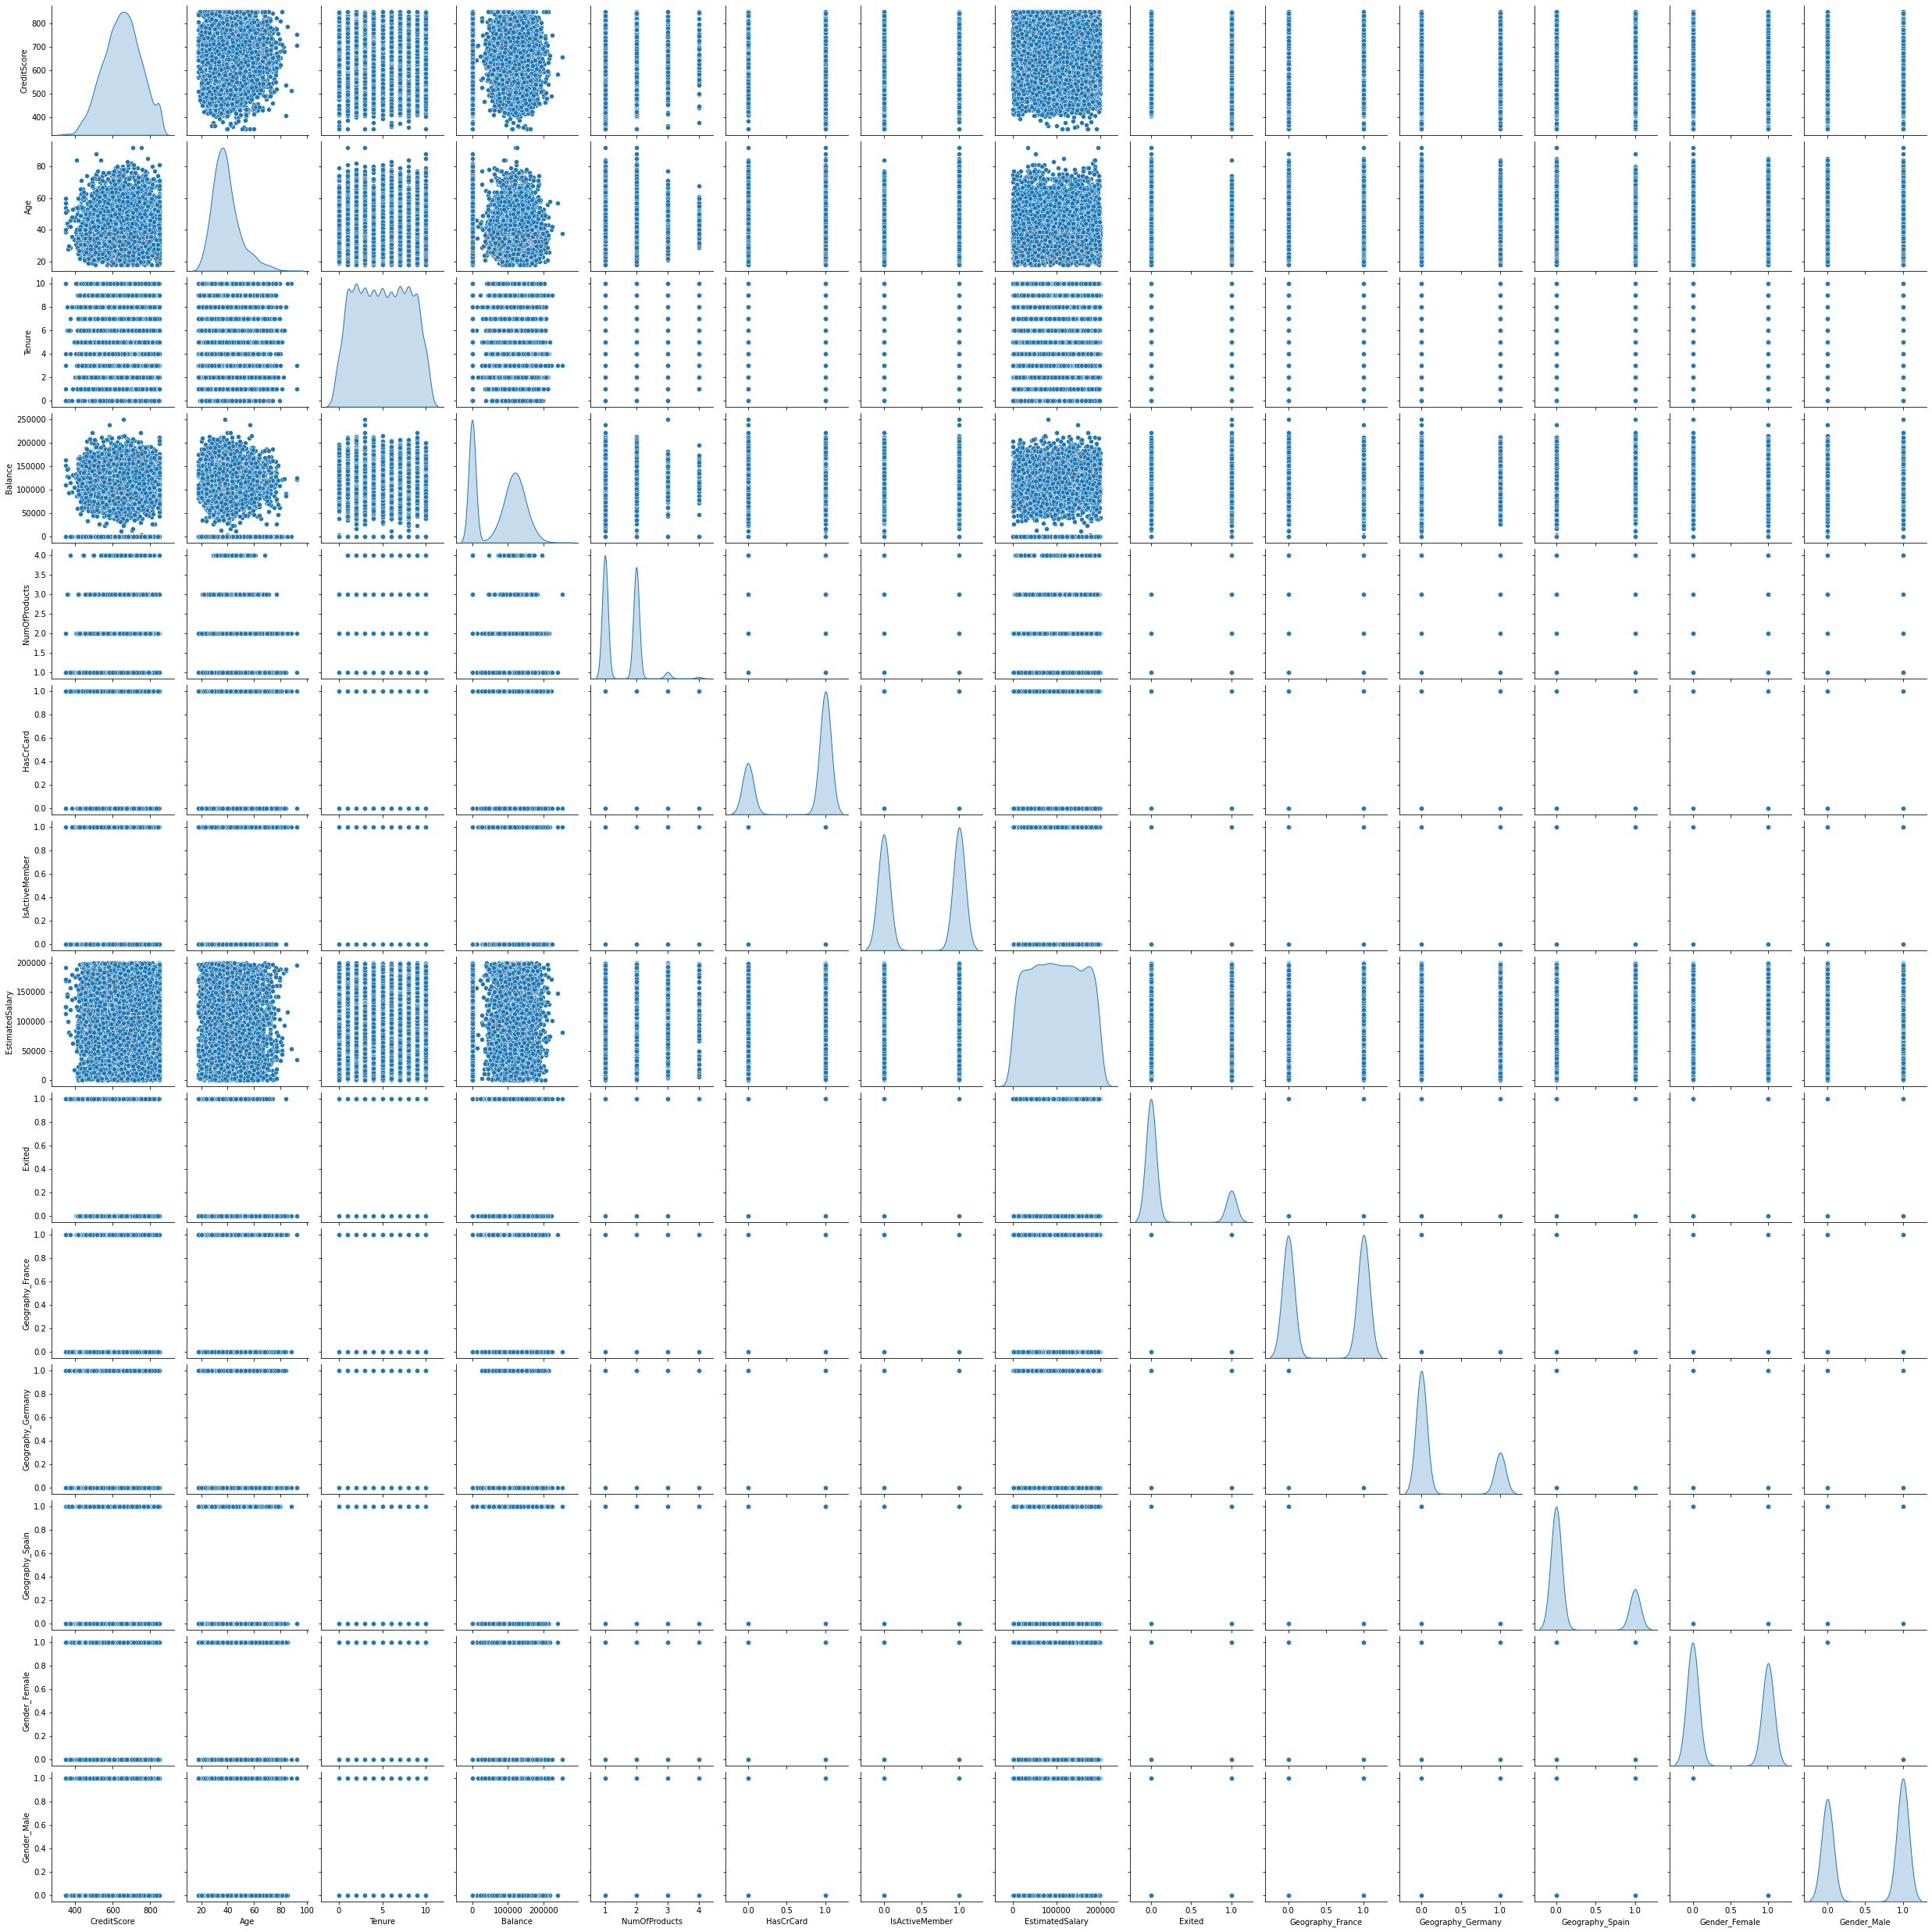

In [30]:
#Step1: Pairplot analysis

sns.pairplot(pdata,diag_kind='kde')

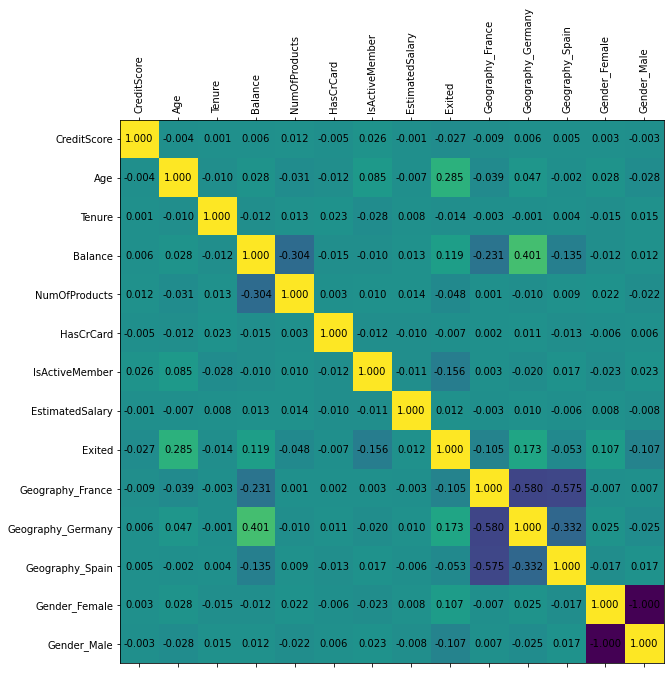

In [31]:
#Step2: Plotting correlation to analyze how different variables are correlated with each other
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

plot_corr(pdata)

In [32]:
#Step3: Specific variable analysis. 
#Considering only Balance and NumOfProducts for specific analysis based on above graphs.

#Combined Analysis of Balance and Exited to Understand if All Customers who have Balance = 0, Exited from the Bank.
print(pdata[pdata['Balance']==0]["Balance"].count())

pdata1 = pdata[pdata['Exited']==1][['Balance','Exited']].groupby(['Balance'])['Exited'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
pdata1

3617


,Balance,count
0,0.00,500
1153,137986.58,1
1031,131593.85,1
1030,131583.59,1
1029,131441.51,1
...,...,...
510,109032.23,1
509,108960.00,1
508,108924.33,1
507,108914.17,1


In [33]:
#Combined Analysis of Balance and NumOfProducts to Understand if All Customers who have NumOfProducts = 4, Exited from the Bank.

print(pdata[pdata['NumOfProducts']==4]["NumOfProducts"].count())

pdata1 = pdata[pdata['Exited']==1][['NumOfProducts','Exited']].groupby(['NumOfProducts'])['Exited'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
pdata1

60


,NumOfProducts,count
0,1,1409
1,2,348
2,3,220
3,4,60


In [34]:
#Combined Analysis of Balance and Tenure.

print(pdata[pdata['Exited']==1]["Exited"].count())

pdata1 = pdata[pdata['Exited']==1][['Tenure','Exited']].groupby(['Tenure'])['Exited'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
pdata1

2037


,Tenure,count
1,1,232
3,3,213
9,9,213
5,5,209
4,4,203
2,2,201
8,8,197
6,6,196
7,7,177
10,10,101


CREDITSCORE - Exit Comparison


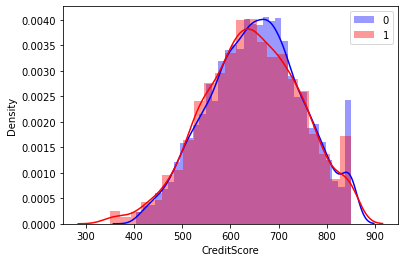

AGE - Exit Comparison


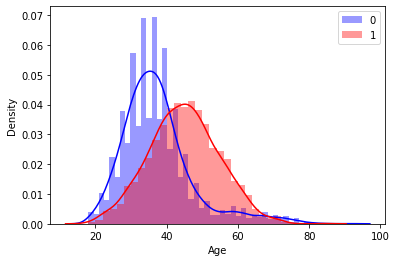

TENURE - Exit Comparison


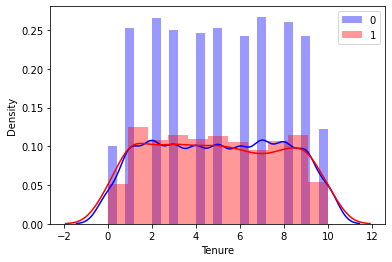

BALANCE - Exit Comparison


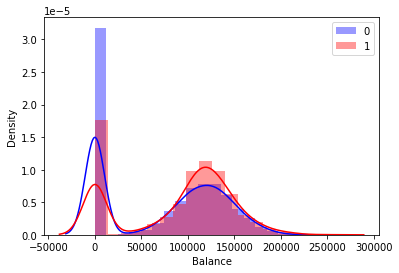

NUMOFPRODUCTS - Exit Comparison


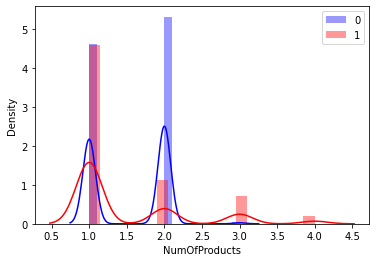

HASCRCARD - Exit Comparison


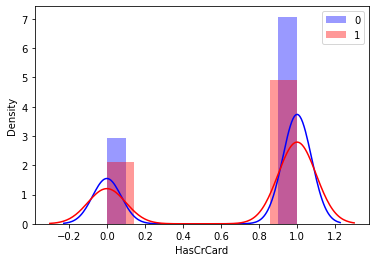

ISACTIVEMEMBER - Exit Comparison


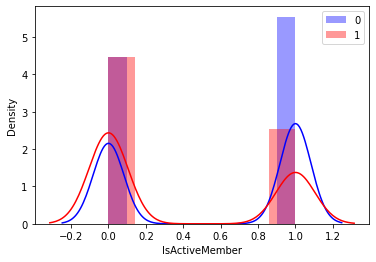

ESTIMATEDSALARY - Exit Comparison


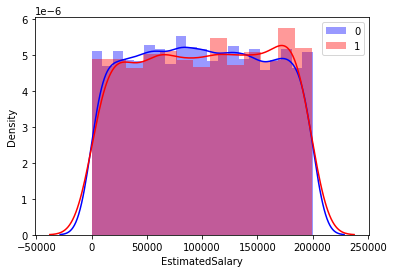

GEOGRAPHY_FRANCE - Exit Comparison


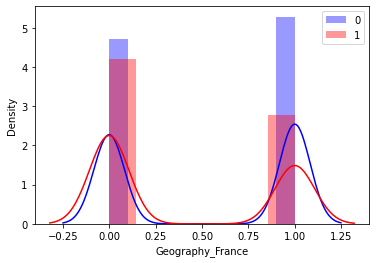

GEOGRAPHY_GERMANY - Exit Comparison


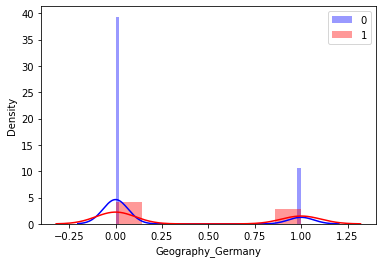

GEOGRAPHY_SPAIN - Exit Comparison


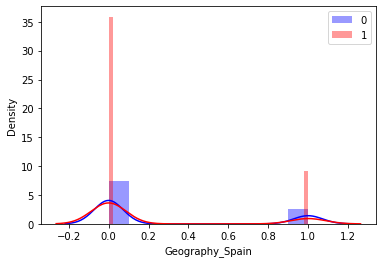

GENDER_FEMALE - Exit Comparison


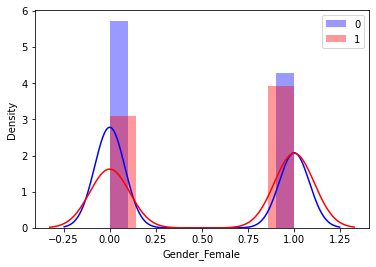

GENDER_MALE - Exit Comparison


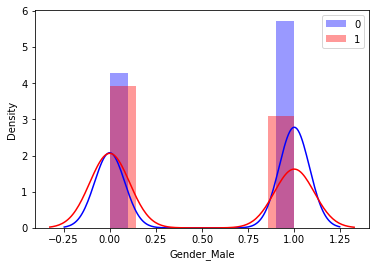

In [35]:
for i in pdata.columns[pdata.columns != 'Exited']:
   print(i.upper(),"- Exit Comparison")
   sns.distplot(pdata[pdata['Exited']==0][i],color='b',label=0)
   sns.distplot(pdata[pdata['Exited']==1][i],color='r',label=1)
   plt.legend()
   plt.show()

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. Many of these variables don't have a linear relationship among them.
2. All the customers who have *NumOfProducts* = 4, *Exited*.
3. Column *Exited* has +ve correlation with *Balance*. However, out of 3617 customers who have zero *Balance*, 500 *Exited*.
4. *Exited* has +ve correlationship with *Age* (meaning old customers tend to exit more than young ones), *Geography_Germany*, and *Gender_Female*. Means customers in Germany and Female customers have higher attrition rate than their counterparts.
5. *Exited* has -ve correlationship with *IsActiveMember*, *Geography_France*, and *Gender_Male*.
6. *Exited* shows a weak linear correlationship (+ve or -ve) with *Tenure*, *NumOfProducts*, *Geography_Spain*, and *EstimatedSalary*. These columns may have non-linear correlationship with *Exited*. e.g. It's already been observed that all the customers who have *NumOfProducts* = 4, *Exited*.

# **`Deliverable – 4: Data Split:`** <a id = "link105"></a>

<a href = #link101> Back to Index </a>


## **`Approach:`** 

<a href = #link101> Back to Index </a>

1. Distinguish the feature and target set. 
2. Divide the data set into training and test sets.

In [36]:
#1. Distinguish the feature and target set. 

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=pdata.drop("Exited",axis=1,inplace=False)

# Specify the target labels and flatten array
y= pdata["Exited"]

In [37]:
#2. Divide the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)


### **`Observations:`** 

<a href = #link101> Back to Index </a>

70% training data and 30% testing data.

# **`Deliverable – 5: Normalization`** <a id = "link106"></a>

<a href = #link101> Back to Index </a>

## **`Approach:`** 

<a href = #link101> Back to Index </a>

Scale data to minimize the effect of unit. Possible scaling methods:

1. Use a lambda function (custom)
  * X_Data = X_Data.apply(lambda x: (x - x.min(axis=0)) / ((x.max(axis = 0) - x.min(axis=0)))
2. Use Standard Scaler
  * Scales data in such a way that mean is 0 and standard deviation is 1. (Similar to application of Z-Score). This is more of a standardization technique rather than a normalization technique.
3. Use MinMax Scaler
  * Scales data in such a way that all the values are between 0 and 1. This is a normalization technique.

The questions mentions that data should be normalized. Therefore, MinMaxScaler is used here. Also, it is recommended to use MinMaxScaler when algorithm relies on Gradient Descent and / or for ANN / Tensorflow / Keras based algorithms. These algorithms get benefitted if the values are between 0 and 1, as it helps to adjusting weights and also to facilitate learning. On the other hand, Standard Scaler works well in many other use cases like Linear Regression, Logistic Regression, KNN etc. Finally, it is a generic observation that Decision Trees and Random Forests are largely unaffected by scaling.

In [38]:
# Normalize Data Using MinMaxScaler

# Define the scaler 
scaler = MinMaxScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [39]:
X_train

array([[0.538     , 0.18918919, 0.4       , ..., 1.        , 1.        ,
        0.        ],
       [0.586     , 0.21621622, 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.422     , 0.2027027 , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.77      , 0.27027027, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.634     , 0.33783784, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.694     , 0.44594595, 0.1       , ..., 0.        , 0.        ,
        1.        ]])

### **`Observations:`** 

<a href = #link101> Back to Index </a>

One-hot encoded columns were already having a value between 0 and 1. Therefore, those values seem unchanged.

# **`Deliverable – 6: Modelling`** <a id = "link107"></a>

<a href = #link101> Back to Index </a>

## **`Approach:`** 

<a href = #link101> Back to Index </a>

Following is the approach:

1. Model = Sequential.
2. Since this classification problem has only 2 classes, softmax() is not used in the output.
3. Try and test models with 2 and 3 hidden layers and check the performance difference.
4. Number of Neurons in Hidden Layer are as follows. All numbers are are multiple of number of variables in X_Train: 
  * Layer 1 :- In some cases, put more neurons in this layer than in Layer 2 and vice versa.
  * Layer 2 :- In some cases, put more neurons in this layer than in Layer 1 and vice versa. 
  * Layer 3 = 1 (Output Layer. Since this is a binary-classification problem, output layer is good with 1 Neuron)
5. Activation Function = Check for relu, sigmoid, and tanh
6. loss = BinaryCrossentropy, since this is a classification problem with 2 classes.
7. optimizer = 'adam'
8. metrics = ['accuracy']

***Note***: The final model is a result of multiple trial and error combinations. All those combinations are not demonstrated.
  


In [40]:
#Model1: Try very large number of neurons in each layer

model = Sequential()

#Input Layer
model.add(Dense(520, input_shape = (13,), activation = 'relu',name="layer1"))

#Hidden Layer
model.add(Dense(130, activation = 'sigmoid',name="layer2"))

#Output layer.
model.add(Dense(1, activation = 'sigmoid',name="layer3"))

#loss is not changed because this is a binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs = 1000, batch_size = 10000, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

Accuracy: 0.855
Loss: 0.362


In [42]:
y_pred = model.predict(X_test)
y_pred[:10]
YP = []
for i in y_pred:
    if i >= 0.5:
        YP.append(1)
    else:
        YP.append(0)
print(classification_report(y_test,YP))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2416
           1       0.67      0.52      0.58       584

    accuracy                           0.86      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [43]:
#Model2: Try Small number of neurons (1/10 compared to previous case) in each layer

model = Sequential()

#Input Layer
model.add(Dense(52, input_shape = (13,), activation = 'relu',name="layer1"))

#Hidden Layer
model.add(Dense(13, activation = 'sigmoid',name="layer2"))

#Output layer.
model.add(Dense(1, activation = 'sigmoid',name="layer3"))

#loss is not changed because this is a binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [44]:
#Number of epochs not changed.
model.fit(X_train, y_train, epochs = 1000, batch_size = 10000, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

Accuracy: 0.847
Loss: 0.372


In [45]:
y_pred = model.predict(X_test)
y_pred[:10]
YP = []
for i in y_pred:
    if i >= 0.5:
        YP.append(1)
    else:
        YP.append(0)
print(classification_report(y_test,YP))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2416
           1       0.72      0.35      0.47       584

    accuracy                           0.85      3000
   macro avg       0.79      0.66      0.69      3000
weighted avg       0.83      0.85      0.82      3000



### **`Observations:`** 

<a href = #link101> Back to Index </a>

It could be observed that accuracy increased and loss decreased when the number of neurons were decreased. Let's try to decrease further.

In [46]:
#Model3: Try Small number of neurons (1/2 compared to previous case) in each layer
model = Sequential()

#Input Layer
model.add(Dense(26, input_shape = (13,), activation = 'relu',name="layer1"))

#Hidden Layer
model.add(Dense(7, activation = 'sigmoid',name="layer2"))

#Output layer.
model.add(Dense(1, activation = 'sigmoid',name="layer3"))

#loss is not changed because this is a binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [47]:
#Number of epochs not changed.

model.fit(X_train, y_train, epochs = 1000, batch_size = 10000, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

Accuracy: 0.832
Loss: 0.395


In [48]:
y_pred = model.predict(X_test)
y_pred[:10]
YP = []
for i in y_pred:
    if i >= 0.5:
        YP.append(1)
    else:
        YP.append(0)
print(classification_report(y_test,YP))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2416
           1       0.68      0.26      0.38       584

    accuracy                           0.83      3000
   macro avg       0.76      0.62      0.64      3000
weighted avg       0.81      0.83      0.80      3000



### **`Observations:`** 

<a href = #link101> Back to Index </a>

It could be observed that accuracy decreased and loss increased when the number of neurons were decreased. So go with the Model2.

In [49]:
#Model4: Same as Model2. But number of Neurons in Layer1 and Layer2 are interchanged

model = Sequential()

#Input Layer
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(13, input_shape = (13,), activation = 'relu',name="layer1"))

#Hidden Layer
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(52, activation = 'sigmoid',name="layer2"))

#Output layer.
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(1, activation = 'sigmoid',name="layer3"))

#loss is not changed because this is a binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [50]:
model.fit(X_train, y_train, epochs = 1000, batch_size = 10000, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

Accuracy: 0.846
Loss: 0.366


In [51]:
y_pred = model.predict(X_test)
y_pred[:10]
YP = []
for i in y_pred:
    if i >= 0.5:
        YP.append(1)
    else:
        YP.append(0)
print(classification_report(y_test,YP))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2416
           1       0.74      0.32      0.45       584

    accuracy                           0.85      3000
   macro avg       0.80      0.65      0.68      3000
weighted avg       0.83      0.85      0.82      3000



### **`Observations:`** 

<a href = #link101> Back to Index </a>

This model has similar results to Model2. Next try to reduce batch size with Model4.

In [52]:
#Model5: Same as Model2. Batch size reduced

model = Sequential()

#Input Layer
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(52, input_shape = (13,), activation = 'relu',name="layer1"))

#Hidden Layer
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(13, activation = 'sigmoid',name="layer2"))

#Output layer.
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(1, activation = 'sigmoid',name="layer3"))

#loss is not changed because this is a binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [53]:
model.fit(X_train, y_train, epochs = 1000, batch_size = 1000, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

Accuracy: 0.862
Loss: 0.330


In [54]:
y_pred = model.predict(X_test)
y_pred[:10]
YP = []
for i in y_pred:
    if i >= 0.5:
        YP.append(1)
    else:
        YP.append(0)
print(classification_report(y_test,YP))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.73      0.47      0.57       584

    accuracy                           0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



### **`Observations:`** 

<a href = #link101> Back to Index </a>

Not much difference in model performance after batch size was reduced. Therefore, let's continue with small batch. Next change number of epochs small or large.

In [55]:
model.fit(X_train, y_train, epochs = 800, batch_size = 1000, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

Accuracy: 0.866
Loss: 0.335


In [56]:
y_pred = model.predict(X_test)
y_pred[:10]
YP = []
for i in y_pred:
    if i >= 0.5:
        YP.append(1)
    else:
        YP.append(0)
print(classification_report(y_test,YP))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [57]:
model.fit(X_train, y_train, epochs = 2500, batch_size = 1000, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

Accuracy: 0.865
Loss: 0.364


In [58]:
y_pred = model.predict(X_test)
y_pred[:10]
YP = []
for i in y_pred:
    if i >= 0.5:
        YP.append(1)
    else:
        YP.append(0)
print(classification_report(y_test,YP))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.73      0.48      0.58       584

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



### **`Observations:`** 

<a href = #link101> Back to Index </a>

No significant difference in model performance observed. So keep epoch = 1000.

In [59]:
#Trial Model: Try with 2 hidden layers

model = Sequential()

#Input Layer
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(52, input_shape = (13,), activation = 'relu',name="layer1"))

#Hidden Layer
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(13, activation = 'sigmoid',name="layer2"))

#Hidden Layer
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(6, activation = 'tanh',name="layer3"))

#Output layer.
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(1, activation = 'sigmoid',name="layer4"))

#loss is not changed because this is a binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [60]:
model.fit(X_train, y_train, epochs = 1000, batch_size = 1000, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

Accuracy: 0.867
Loss: 0.340


In [61]:
y_pred = model.predict(X_test)
y_pred[:10]
YP = []
for i in y_pred:
    if i >= 0.5:
        YP.append(1)
    else:
        YP.append(0)
print(classification_report(y_test,YP))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.74      0.49      0.59       584

    accuracy                           0.87      3000
   macro avg       0.81      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000



### **`Observations:`** 

<a href = #link101> Back to Index </a>

No significant difference in model performance observed. So keep number of hidden layers to 2.

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. If any other activation function than sigmoid is used for output layer, then model performance decreases.
2. For the same model, if the fit function and evaluate function are run multiple times, the accuracy and loss also changes. 

# **`Deliverable – 7: Prediction at 0.5 Threshold AND Deliverable – 8: Model Performance Evaluation`** <a id = "link108"></a>

<a href = #link101> Back to Index </a>

***`Note`***: Prediction and Threshold Evaluation for each model is performed immediately after the model is fit. Corresponding comments were provided accordingly. Please refer above section (Deliverable 6) for details. Following is the Prediction and Performance Evaluation for the Final Model under consideration.

In [62]:
#Final Model:

model = Sequential()

#Input Layer
#Following values of hyperparameters worked the best for this layer based on many combinations tried
model.add(Dense(52, input_shape = (13,), activation = 'relu',name="layer1"))

#Hidden Layer
#Following values of hyperparameters worked the best for this layer based on many combinations tried. tanh or relu dont improve.
model.add(Dense(13, activation = 'sigmoid',name="layer2"))

#Output layer.
#Following values of hyperparameters worked the best for this layer based on many combinations tried. tanh or relu dont improve.
model.add(Dense(1, activation = 'sigmoid',name="layer3"))

#loss is not changed because this is a binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [63]:
model.fit(X_train, y_train, epochs = 1000, batch_size = 1000, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

Accuracy: 0.869
Loss: 0.331


In [64]:
y_pred = model.predict(X_test)
y_pred[:10]
YP = []
for i in y_pred:
    if i >= 0.5:
        YP.append(1)
    else:
        YP.append(0)
print(classification_report(y_test,YP))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.75      0.49      0.59       584

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



Text(42.0, 0.5, 'Actual')

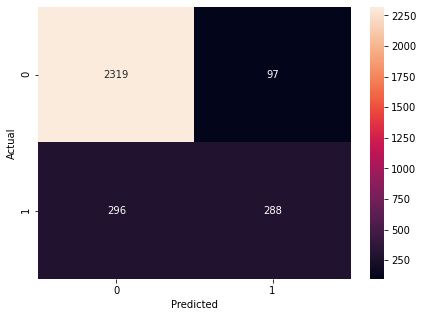

In [65]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=YP)

plt.figure(figsize= (7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### **`Observations:`** 

<a href = #link101> Back to Index </a>

1. Overall accuracy of the final model is more than 86%.
2. This model performs well to predict the non-exiting customers. For non-exit customers, precision, recall, and F1-Score are around 90% (With a tolerance of 2%).
3. For Churned / Exited customers, the model gives a better precision that recall. 
4. The precision score is high (around 75%). This means that out of all the customers that model labels as "Exited", 75% customers actually exit. Therefore, the customers labelled as "Exited" by this model can be looked by the bank on high priority.
5. The recall score is around 50%. This means that out of all the customers that actually exit, our model correctly predictly less than 50% cases. This is an area where the model needs to improve.

### **`Conclusion:`**

1. Although it is true that the model predicts only around 50% of the customers that exit (churn), it labels potential "exit customers" with a high precision. Therefore, while the performance of the model can be improved in subsequent iterations, bank can focus on the customers labelled as "Exited" by this model for retention.